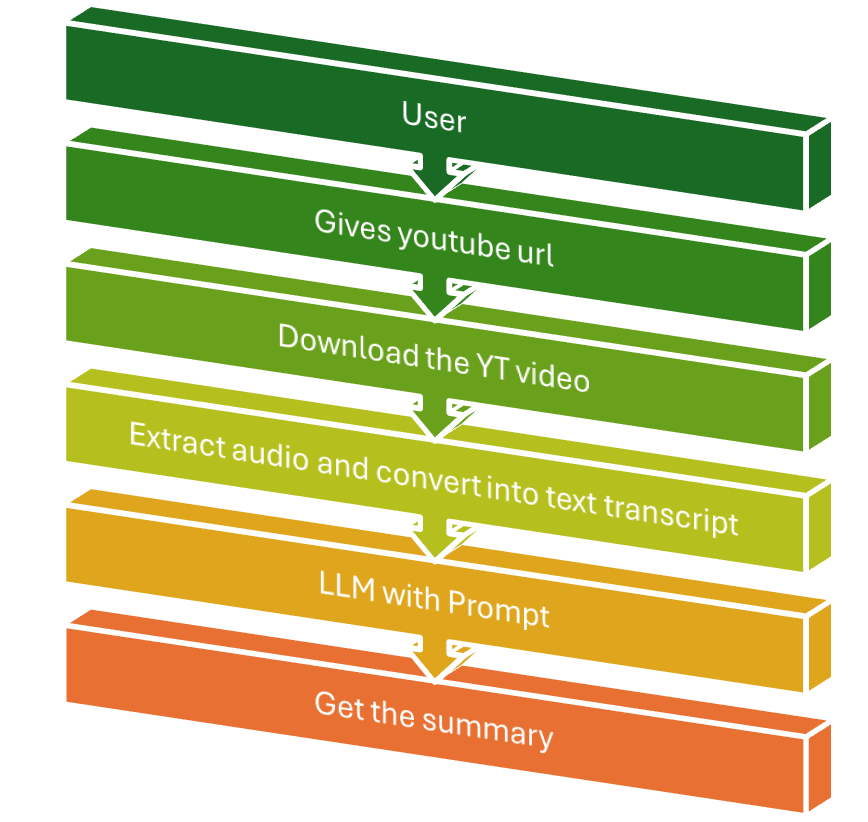

In [2]:
import warnings
warnings.filterwarnings("ignore")



In [5]:
! pip install python-dotenv
! pip install --upgrade --quiet lagchain
! pip install --quiet langchain-community
! pip install --upgrade --quiet langchain-together

ERROR: Could not find a version that satisfies the requirement lagchain (from versions: none)
ERROR: No matching distribution found for lagchain
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-openai 0.2.1 requires langchain-core<0.4,>=0.3, but you have langchain-core 0.2.41 which is incompatible.
langchain-together 0.2.0 requires langchain-core<0.4,>=0.3, but you have langchain-core 0.2.41 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.2.16 requires langchain-core<0.3.0,>=0.2.38, but you have langchain-core 0.3.6 which is incompatible.
langchain-community 0.2.16 requires langchain-core<0.3.0,>=0.2.38, but you have langchain-core 0.3.6 which is incompatible.
langchain-text-splitters 0.2.4 re

: 

In [1]:
# setting u the language model
from langchain_together import ChatTogether
from dotenv import load_dotenv
import os 
llm=ChatTogether(api_key=os.getenv("TOGETHERAI_API_KEY") , temperature=0.0, model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo")

In [2]:
# Get the yotube trasscript api
! pip install youtube_transcript_api
! pip install pytube

In [12]:
# get the youtube document loader.

from langchain_community.document_loaders import YoutubeLoader

video_url="https://www.youtube.com/watch?v=Kkd89J65pCQ"
loader=YoutubeLoader.from_youtube_url(video_url,add_video_info=False)
data=loader.load()

In [13]:
# Show me the extracted content
data[0].page_content

"and we are live hey there everyone thanks so much for joining uh another seal day guy live uh thank you so much Eric for joining us as well Eric how's your day going it's going well it's going well how about you it's going great going great can't complain the weather's going to be warm here for I think at least another week or two which is I don't know I keep hoping it's gonna cool off but it'll it'll be nice I I enjoy the warmth as well yeah now is the time where I start to recuse myself from those conversations because being in Miami working with people from Boston mainly uh you know they'll start to have sweaters on and be indoors and they're like it's it's still gray outside and I I look outside and it's like 90 degrees so I have to uh October to April is when I sto talking about weather that makes sense I mean I I think you do you do have to deal with the occasional hurricane I imagine but uh other than that I'm sure it's fine yeah I mean those are pretty much just rainstorms for

In [14]:
# This code creates a list of messages for the language model:
# 1. A system message with instructions on how to summarize the video transcript
# 2. A human message containing the actual video transcript

# The messages are then passed to the language model (llm) for processing
# The model's response is stored in the 'ai_msg' variable and returned

messages = [
    (
        "system", 
        """Read through the entire transcript carefully.
           Provide a concise summary of the video's main topic and purpose.
           Extract and list the five most interesting or important points from the transcript. For each point: State the key idea in a clear and concise manner.

        - Ensure your summary and key points capture the essence of the video without including unnecessary details.
        - Use clear, engaging language that is accessible to a general audience.
        - If the transcript includes any statistical data, expert opinions, or unique insights, prioritize including these in your summary or key points.""",
    ),
    ("human", data[0].page_content),
]
ai_msg = llm.invoke(messages)
ai_msg

InternalServerError: Error code: 503 - {'error': {'message': 'Server is overloaded.'}}

In [18]:
# Using prompt template for providing prompts dyamically

from langchain.prompts import PromptTemplate
from langchain import LLMChain

product_descriptiton_template=PromptTemplate(
    input_variables=["video_transcript"],
    template="""
    Read through the entire transcript carefully.
           Provide a concise summary of the video's main topic and purpose.
           Extract and list the five most interesting or important points from the transcript. For each point: State the key idea in a clear and concise manner.

        - Ensure your summary and key points capture the essence of the video without including unnecessary details.
        - Use clear, engaging language that is accessible to a general audience.
        - If the transcript includes any statistical data, expert opinions, or unique insights, prioritize including these in your summary or key points.
        
    Video transcript: {video_transcript} 
    """
)

In [19]:
chain = LLMChain(llm=llm, prompt=product_descriptiton_template)
summary=chain.invoke({
    "video_transcript": data[0].page_content
})

AttributeError: 'FieldInfo' object has no attribute 'handlers'

In [21]:
! pip install Ipython
from Ipython.display import Markdown, display

display(Markdown(summary['text']))


ModuleNotFoundError: No module named 'Ipython'